# Stock Market Analysis and Prediction using Monte Carlo Simulations

This notebook analyzes historical stock, bond, and cryptocurrency data using YFinance. We will predict future price trends using **Monte Carlo Simulations**. The analysis includes:
- Historical price visualization
- Volume-price correlation
- Monte Carlo simulations for stock price predictions
- Correlation matrix for stock, bond, and crypto price changes


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Loading Stock, Bond, and Cryptocurrency Data

In this section, we use YFinance to download historical data for selected stocks, bonds, and cryptocurrency. The data includes:
- Adjusted closing prices (for price trends)
- Volume (for volume correlation analysis)

We'll load the data for the following tickers:
- **Fang**: Fang Stocks
- **TLT**: Bond ETF
- **^GSPC**: S&P 500 index
- **BTC-USD**: Bitcoin in USD


In [2]:
# Function to download stock, index fund, bond, and crypto data using YFinance
def download_yf_data(tickers, start_date, end_date):
    data = {}
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)
            data[ticker] = stock_data[['Adj Close', 'Volume']]
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")
    return pd.concat(data, axis=1)

In [3]:
# Define your tickers (including BTC as well)
stock_tickers = ['AAPL','GOOG','MSFT','AMZN','NFLX']  # Add more stocks as needed
bond_tickers = ['TLT']  # Example of a bond ETF
index_tickers = ['^GSPC']  # S&P 500 index
crypto_ticker = ['BTC-USD']  # Bitcoin USD ticker from YFinance

# Define date range
start_date = '2020-01-01'
end_date = '2023-01-01'

# Downloading stock, bond, index fund, and crypto data
print("Downloading stock, bond, index fund, and crypto data...")
stock_bond_data = download_yf_data(stock_tickers + bond_tickers + index_tickers + crypto_ticker, start_date, end_date)

# Fill any missing data using forward fill
stock_bond_data.ffill(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
stock_bond_data.describe()

AAPL                       GOOG                       MSFT  \
         Adj Close        Volume    Adj Close        Volume    Adj Close   
count  1095.000000  1.095000e+03  1095.000000  1.095000e+03  1095.000000   
mean    128.010829  1.139575e+08   104.581800  3.102524e+07   239.293234   
std      30.518559  6.024748e+07    26.701161  1.371455e+07    47.453656   
min      54.569725  3.519590e+07    52.701576  6.936000e+06   130.141022   
25%     113.257786  7.625990e+07    78.457825  2.192800e+07   205.761215   
50%     132.735519  9.435980e+07   104.643013  2.773800e+07   240.592346   
75%     148.781097  1.317476e+08   128.930367  3.569200e+07   277.204803   
max     179.273590  4.265100e+08   150.339783  8.975000e+07   335.105774   

                            AMZN                       NFLX                \
             Volume    Adj Close        Volume    Adj Close        Volume   
count  1.095000e+03  1095.000000  1.095000e+03  1095.000000  1.095000e+03   
mean   3.171706e+07   142.304622  8.257390e+07   429.851122  7.156910e+06   
std    1.377935e+07    27.857875  3.893499e+07   134.285980  7.152447e+06   
min    9.200800e+06    81.820000  2.903800e+07   166.369995  1.144000e+06   
25%    2.274330e+07   118.092251  5.708200e+07   334.244995  3.726800e+06   
50%    2.832650e+07   154.460495  7.151800e+07   480.450012  5.346200e+06   
75%    3.643990e+07   164.431000  9.760900e+07   525.595001  8.164900e+06   
max    9.701270e+07   186.570496  3.113460e+08   691.690002  1.333875e+08   

               TLT                      ^GSPC                     BTC-USD  \
         Adj Close        Volume    Adj Close        Volume     Adj Close   
count  1095.000000  1.095000e+03  1095.000000  1.095000e+03   1096.000000   
mean    128.293621  1.600009e+07  3862.550350  4.673491e+09  28900.779941   
std      17.086603  8.574830e+06   550.491409  1.235656e+09  17117.490259   
min      86.349602  3.117100e+06  2237.399902  1.706460e+09   4970.788086   
25%     118.668491  1.006520e+07  3423.179932  3.901940e+09  11679.550049   
50%     131.779999  1.425910e+07  3913.969971  4.397230e+09  23696.078125   
75%     142.265015  1.998035e+07  4327.160156  5.084030e+09  42897.068359   
max     154.570236  7.628830e+07  4796.560059  9.976520e+09  67566.828125   

                     
             Volume  
count  1.096000e+03  
mean   3.672738e+10  
std    1.891026e+10  
min    9.744636e+09  
25%    2.537217e+10  
50%    3.300065e+10  
75%    4.325613e+10  
max    3.509679e+11

In [5]:
stock_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2020-01-01 to 2022-12-31
Freq: D
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (AAPL, Adj Close)     1095 non-null   float64
 1   (AAPL, Volume)        1095 non-null   float64
 2   (GOOG, Adj Close)     1095 non-null   float64
 3   (GOOG, Volume)        1095 non-null   float64
 4   (MSFT, Adj Close)     1095 non-null   float64
 5   (MSFT, Volume)        1095 non-null   float64
 6   (AMZN, Adj Close)     1095 non-null   float64
 7   (AMZN, Volume)        1095 non-null   float64
 8   (NFLX, Adj Close)     1095 non-null   float64
 9   (NFLX, Volume)        1095 non-null   float64
 10  (TLT, Adj Close)      1095 non-null   float64
 11  (TLT, Volume)         1095 non-null   float64
 12  (^GSPC, Adj Close)    1095 non-null   float64
 13  (^GSPC, Volume)       1095 non-null   float64
 14  (BTC-USD, Adj Close)  1096 non-null   float64


## Visualizing Historical Prices of Stocks, Bonds, and Cryptocurrency

This section provides a visualization of historical prices for the selected assets. It helps to observe trends in stock, bond, and crypto prices over the selected time period (2020-2023).


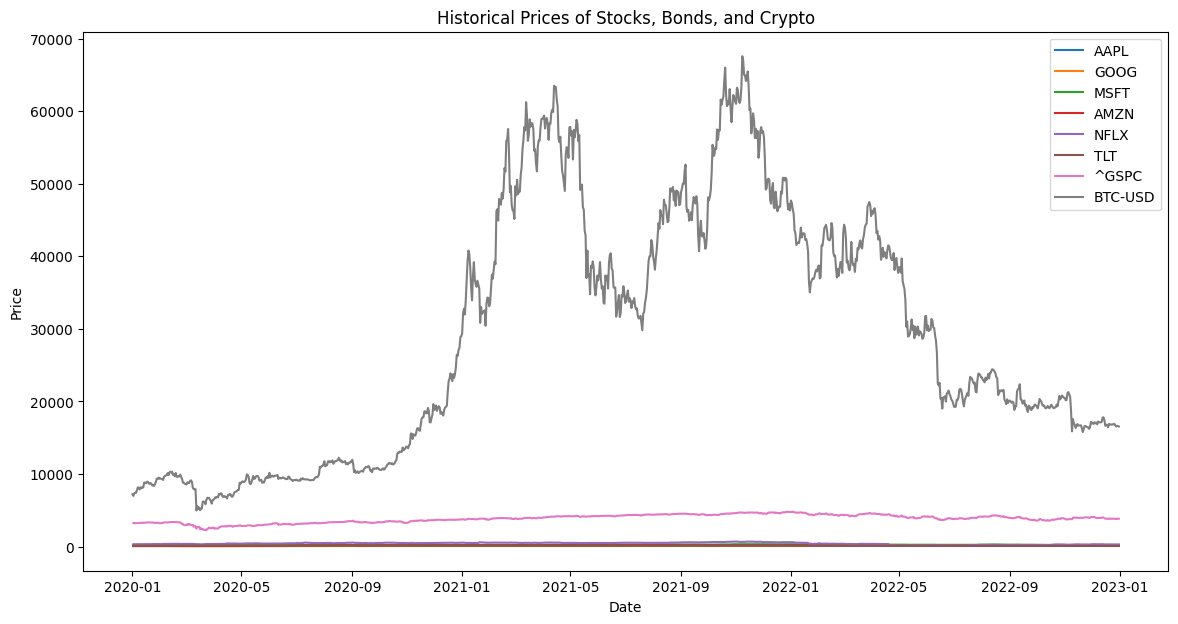

In [6]:
# Visualization of Historical Prices
def plot_historical_prices(data):
    plt.figure(figsize=(14, 7))
    for ticker in stock_tickers + bond_tickers + index_tickers + crypto_ticker:
        plt.plot(data[ticker]['Adj Close'], label=ticker)
    plt.title('Historical Prices of Stocks, Bonds, and Crypto')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_historical_prices(stock_bond_data)


## Volume-Price Correlation

We calculate and visualize the correlation between the trading volume and adjusted closing prices for each asset. This analysis helps determine if there's a significant relationship between trading volume and price changes for each asset.
- A high correlation might indicate that prices tend to rise with high volume, or vice versa.


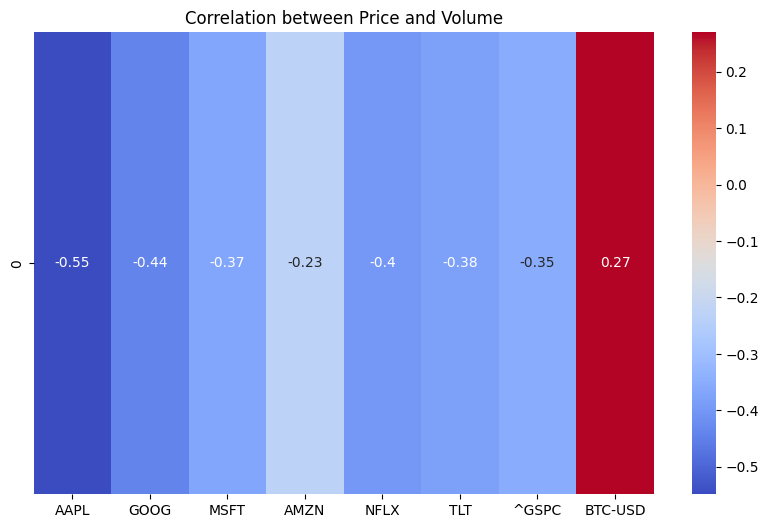

In [7]:
# Correlation Analysis between Volume and Price
def volume_price_correlation(data):
    volume_corr = pd.DataFrame()
    for ticker in stock_tickers + bond_tickers + index_tickers + crypto_ticker:
        adj_close = data[ticker]['Adj Close']
        volume = data[ticker]['Volume']
        volume_corr[ticker] = [adj_close.corr(volume)]
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(volume_corr, annot=True, cmap="coolwarm")
    plt.title('Correlation between Price and Volume')
    plt.show()

# Call the function
volume_price_correlation(stock_bond_data)


## Monte Carlo Simulation for Stock Price Prediction

Monte Carlo simulations are used to predict future stock prices by simulating multiple possible price paths. The volatility (calculated as the standard deviation of daily percentage changes) is used to introduce randomness into each simulation.

We run 1,000 Monte Carlo simulations for **AAPL** over the next 30 days to estimate potential future price trends.


In [8]:
def monte_carlo_simulation(start_price, days, volatility, num_simulations=1000):
    results = []
    for _ in range(num_simulations):
        prices = [start_price]
        for _ in range(days):
            daily_return = random.gauss(0, volatility)
            price = prices[-1] * (1 + daily_return)
            prices.append(price)
        results.append(prices)
    return np.array(results)

In [9]:
# Predicting for AAPL (as an example)
aapl_data = stock_bond_data['AAPL']['Adj Close'].dropna()
start_price = aapl_data.iloc[-1]  # Use iloc[-1] to get the last value
volatility = aapl_data.pct_change(fill_method=None).std()

# Run Monte Carlo simulation
days = 30  # Predicting for the next 30 days
simulations = 1000  # Number of Monte Carlo simulations
monte_carlo_results = monte_carlo_simulation(start_price, days, volatility, simulations)


## Monte Carlo Simulation Results: Price Projections

In this section, we visualize the results of the Monte Carlo simulation:
- We plot individual simulation paths for future stock prices.
- We calculate and visualize the mean projection (average expected price) along with the confidence interval, based on the standard deviation of the simulation results.

This gives us an idea of the range in which future prices are likely to fluctuate, along with the most likely price trajectory.


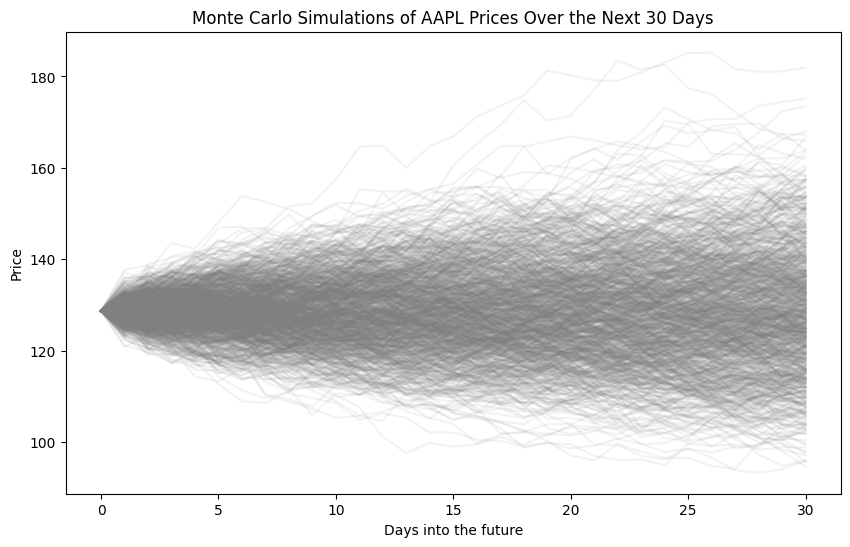

In [10]:
# Plot Monte Carlo Simulation Results
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(monte_carlo_results[i], color='grey', alpha=0.1)

plt.title('Monte Carlo Simulations of AAPL Prices Over the Next 30 Days')
plt.xlabel('Days into the future')
plt.ylabel('Price')
plt.show()


## Monte Carlo Simulation Results: Price Projections

In this section, we visualize the results of the Monte Carlo simulation:
- We plot individual simulation paths for future stock prices.
- We calculate and visualize the mean projection (average expected price) along with the confidence interval, based on the standard deviation of the simulation results.

This gives us an idea of the range in which future prices are likely to fluctuate, along with the most likely price trajectory.


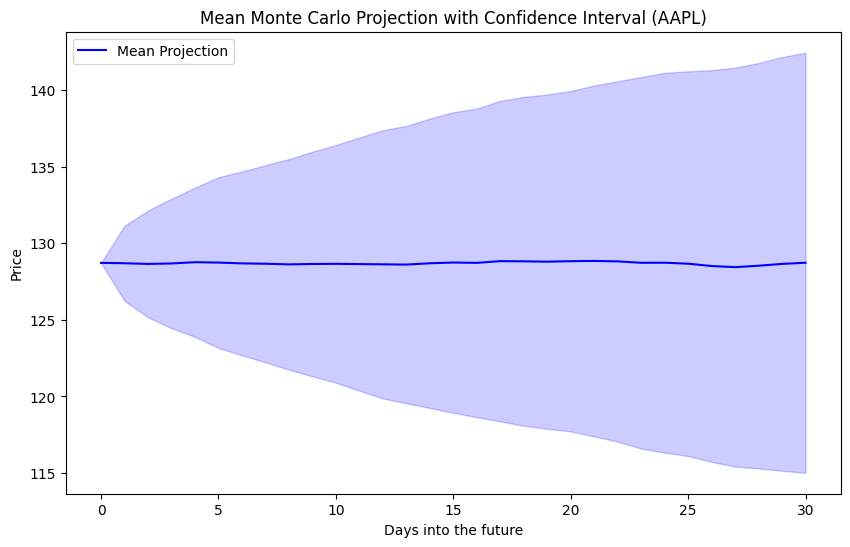

In [11]:
# Calculate the mean and standard deviation of the Monte Carlo simulation
mean_projection = np.mean(monte_carlo_results, axis=0)
std_dev_projection = np.std(monte_carlo_results, axis=0)

# Plot the average future price projection with confidence interval
plt.figure(figsize=(10, 6))
plt.plot(mean_projection, label="Mean Projection", color='blue')
plt.fill_between(np.arange(days + 1), mean_projection - std_dev_projection, mean_projection + std_dev_projection, color='blue', alpha=0.2)
plt.title('Mean Monte Carlo Projection with Confidence Interval (AAPL)')
plt.xlabel('Days into the future')
plt.ylabel('Price')
plt.legend()
plt.show()

## Correlation Matrix for Price Changes

We calculate and visualize the correlation between the percentage price changes of different assets (stocks, bonds, and cryptocurrency). This correlation matrix helps us understand how the assets' prices move relative to one another.
- A high positive correlation indicates that two assets tend to move in the same direction.
- A high negative correlation indicates that the assets move in opposite directions.


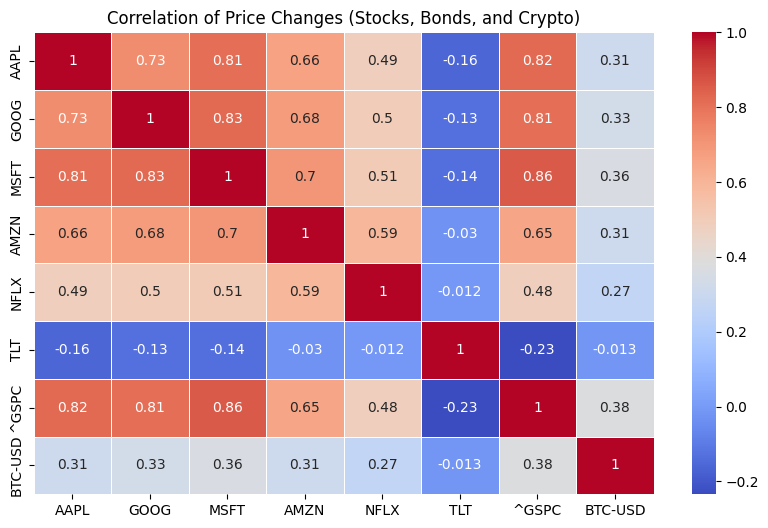

In [12]:
# Display correlation of price changes over time
def price_correlation(data):
    adj_close_data = pd.DataFrame()
    for ticker in stock_tickers + bond_tickers + index_tickers + crypto_ticker:
        adj_close_data[ticker] = data[ticker]['Adj Close']
    
    correlation_matrix = adj_close_data.pct_change().corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title('Correlation of Price Changes (Stocks, Bonds, and Crypto)')
    plt.show()

price_correlation(stock_bond_data)

## Conclusion

In this notebook, we performed stock market analysis using historical data, including:
- Visualizing historical price trends of selected assets
- Analyzing the correlation between volume and prices
- Simulating future price trends using Monte Carlo simulations
- Understanding correlations between stocks, bonds, and cryptocurrency price changes

The Monte Carlo simulation provides a probabilistic outlook for future price movements, offering insights into the potential risks and returns of different investments.
